In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.io
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import sklearn.utils

In [20]:
if torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(f"Using {device} device")

Using mps device


In [21]:
rockImages = np.empty((250, 3, 300, 300))
paperImages = np.empty((250, 3, 300, 300))
scissorImages = np.empty((250, 3, 300, 300))
trainImages = np.empty((600, 3, 300, 300))
testImages = np.empty((150, 3, 300, 300))
trainLabels = np.empty((600))
testLabels = np.empty((150))
i = 0
files = os.listdir("images/rock/")
for f in files:
    filePath = os.path.join("images/rock/", f)
    if os.path.isfile(filePath):
        rockImages[i, :, :, :] = np.float32(torchvision.io.read_image(filePath))/255
        i += 1
np.random.shuffle(rockImages)
trainImages[:200, :, :, :] = rockImages[:200, :, :, :]
testImages[:50, :, :, :] = rockImages[200:250, :, :, :]
trainLabels[:200] = 0
testLabels[:50] = 0

i = 0
files = os.listdir("images/paper/")
for f in files:
    filePath = os.path.join("images/paper/", f)
    if os.path.isfile(filePath):
        paperImages[i, :, :, :] = np.float32(torchvision.io.read_image(filePath))/255
        i += 1
np.random.shuffle(paperImages)
trainImages[200:400, :, :, :] = paperImages[:200, :, :, :]
testImages[50:100, :, :, :] = paperImages[200:250, :, :, :]
trainLabels[200:400] = 1
testLabels[50:100] = 1

i = 0
files = os.listdir("images/scissors/")
for f in files:
    filePath = os.path.join("images/scissors/", f)
    if os.path.isfile(filePath):
        scissorImages[i, :, :, :] = np.float32(torchvision.io.read_image(filePath))/255
        i += 1
np.random.shuffle(scissorImages)
trainImages[400:600, :, :, :] = scissorImages[:200, :, :, :]
testImages[100:150, :, :, :] = scissorImages[200:250, :, :, :]
trainLabels[400:600] = 2
testLabels[100:150] = 2


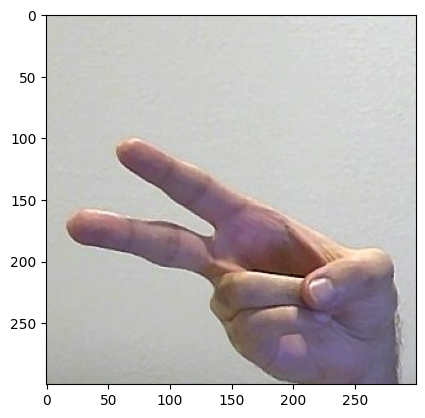

In [22]:
plt.imshow(np.transpose(trainImages[480, :, :, :], (1, 2, 0)))

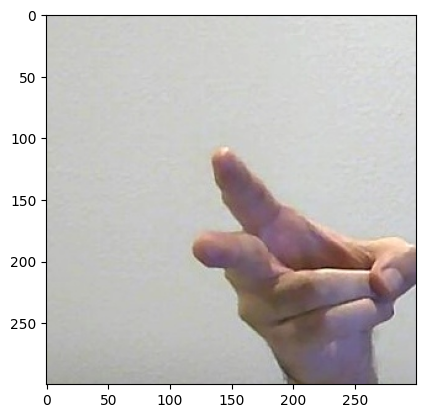

In [23]:
plt.imshow(np.transpose(testImages[125, :, :, :], (1, 2, 0)))

In [24]:
shuffler = np.random.permutation(len(trainLabels))
trainImages = trainImages[shuffler]
trainLabels = trainLabels[shuffler]

1.0


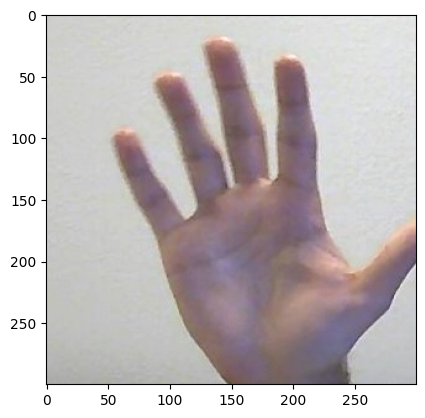

In [32]:
plt.imshow(np.transpose(trainImages[3, :, :, :], (1, 2, 0)))
print(trainLabels[3])

In [26]:
shuffler = np.random.permutation(len(testLabels))
testImages = testImages[shuffler]
testLabels = testLabels[shuffler]

2.0


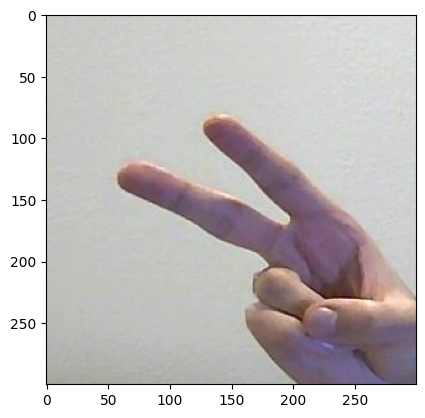

In [30]:
plt.imshow(np.transpose(testImages[4, :, :, :], (1, 2, 0)))
print(testLabels[4])